In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [286]:
df = pd.read_csv("../data/coffee.csv")
df["observation_date"] = pd.to_datetime(df["observation_date"])

In [287]:
# y = df["PCOFFOTMUSDM"] / 100
# x = df["observation_date"]

# plt.figure(figsize=(12, 6))
# plt.plot(x, y, linestyle='-', color='b')

# plt.xlabel("Year")
# plt.ylabel("Price")
# plt.title("Global Price of Coffee (USD per Pound)")

# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:.2f}'))
# ax.set_xlim([df["observation_date"].min(), df["observation_date"].max()])
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [288]:
df1 = pd.read_csv("../data/sugar.csv")
df1["observation_date"] = pd.to_datetime(df1["observation_date"])

In [289]:
# y = df1["PSUGAISAUSDM"] / 100
# x = df1["observation_date"]

# plt.figure(figsize=(12, 6))
# plt.plot(x, y, linestyle='-', color='red')

# plt.xlabel("Year")
# plt.ylabel("Price")
# plt.title("Global Price of Sugar (USD per Pound)")

# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:.2f}'))
# ax.set_xlim([df["observation_date"].min(), df["observation_date"].max()])
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [290]:
com_df = pd.merge(df, df1, on="observation_date")
com_df["date"] = pd.to_datetime(com_df["observation_date"])

In [291]:
# com_df['date'] = pd.to_datetime(com_df['observation_date'])

# plt.figure(figsize=(10, 6))

# com_df['PCOFFOTMUSDM'] = com_df['PCOFFOTMUSDM'] / 100
# com_df['PSUGAISAUSDM'] = com_df['PSUGAISAUSDM'] / 100

# plt.plot(com_df['date'], com_df['PCOFFOTMUSDM'], label='Price of Coffee', color='blue')
# plt.plot(com_df['date'], com_df['PSUGAISAUSDM'], label='Price of Sugar', color='red')

# plt.xlabel('Year')
# plt.ylabel('Price in USD')

# plt.title('Price of Coffee and Price of Sugar')

# plt.legend()

# formatter = FuncFormatter(lambda x, pos: f'${x:.2f}')
# plt.gca().yaxis.set_major_formatter(formatter)

# plt.xticks(rotation=45)

# plt.tight_layout()

# plt.show()

In [292]:
df2 = pd.read_csv("../data/tea.csv")
df2["observation_date"] = pd.to_datetime(df2["observation_date"])

In [293]:
# y = df2["PTEAUSDM"] * 0.45359237 / 100
# x = df2["observation_date"]

# plt.figure(figsize=(12, 6))
# plt.plot(x, y, linestyle='-', color='green')

# plt.xlabel("Year")
# plt.ylabel("Price")
# plt.title("Global Price of Tea (USD per Pound)")

# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:.2f}'))
# ax.set_xlim([df["observation_date"].min(), df["observation_date"].max()])
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [294]:
com_df2 = pd.merge(df, df2, on="observation_date")
com_df2["date"] = pd.to_datetime(com_df2["observation_date"])

In [295]:
# com_df2['date'] = pd.to_datetime(com_df2['observation_date'])

# plt.figure(figsize=(10, 6))

# com_df2['PCOFFOTMUSDM'] = com_df2['PCOFFOTMUSDM'] / 100
# com_df2['PTEAUSDM'] = com_df2['PTEAUSDM'] * 0.45359237 / 100

# plt.plot(com_df2['date'], com_df2['PCOFFOTMUSDM'], label='Price of Coffee', color='blue')
# plt.plot(com_df2['date'], com_df2['PTEAUSDM'], label='Price of Tea', color='green')

# plt.xlabel('Year')
# plt.ylabel('Price in USD')

# plt.title('Price of Coffee vs Price of Tea')

# plt.legend()

# formatter = FuncFormatter(lambda x, pos: f'${x:.2f}')
# plt.gca().yaxis.set_major_formatter(formatter)

# plt.xticks(rotation=45)

# plt.tight_layout()

# plt.show()

In [296]:
com_df3 = pd.merge(com_df, df2, on="observation_date")

In [297]:
# plt.figure(figsize=(10, 6))

# com_df3['PCOFFOTMUSDM'] = com_df2['PCOFFOTMUSDM'] / 100
# com_df3['PTEAUSDM'] = com_df2['PTEAUSDM'] * 0.45359237 / 100
# com_df3['PSUGAISAUSDM'] = com_df['PSUGAISAUSDM'] / 100

# plt.plot(com_df3['date'], com_df3['PCOFFOTMUSDM'], label='Price of Coffee', color='blue')
# plt.plot(com_df3['date'], com_df3['PTEAUSDM'], label='Price of Tea', color='green')
# plt.plot(com_df3['date'], com_df3['PSUGAISAUSDM'], label='Price of Sugar', color='red')

# plt.xlabel('Year')
# plt.ylabel('Price in USD')

# plt.title('Price of Coffee vs Price of Tea vs Price of Sugar')

# plt.legend()

# formatter = FuncFormatter(lambda x, pos: f'${x:.2f}')
# plt.gca().yaxis.set_major_formatter(formatter)

# plt.xticks(rotation=45)

# plt.tight_layout()

# plt.show()

In [298]:
X = sm.add_constant(com_df3[["PTEAUSDM", "PSUGAISAUSDM"]])
Y = com_df3["PCOFFOTMUSDM"]

model = sm.OLS(Y, X).fit()

print(model.summary())

print(f"\nCoefficients:")
print(f"Intercept: {model.params["const"]}")
print(f"Coefficient for tea (PTEAUSDM): {model.params["PTEAUSDM"]}")
print(f"Coefficient for sugar (PSUGAISAUSDM): {model.params["PSUGAISAUSDM"]}")
print(f"\nR-squared: {model.rsquared}")

                            OLS Regression Results                            
Dep. Variable:           PCOFFOTMUSDM   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     350.0
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           5.10e-90
Time:                        12:01:44   Log-Likelihood:                -2112.9
No. Observations:                 421   AIC:                             4232.
Df Residuals:                     418   BIC:                             4244.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6527      7.664      0.607   

In [299]:
brl_df = pd.read_csv("../data/brl_data_clean.csv")
vnd_df = pd.read_csv("../data/vnd_data_clean.csv")
cop_df = pd.read_csv("../data/cop_data_clean.csv")
idr_df = pd.read_csv("../data/idr_data_clean.csv")
hnl_df = pd.read_csv("../data/hnl_data_clean.csv")

xr_df = brl_df
for df in [vnd_df, cop_df, idr_df, hnl_df]:
    xr_df = pd.merge(xr_df, df, on="Date", how="inner")
xr_df

,Date,brl Exchange Rate,vnd Exchange Rate,cop Exchange Rate,idr Exchange Rate,hnl Exchange Rate
0,01/01/1990,0.000006,5479.329529,440.08,1804.850000,2.0000
1,02/01/1990,0.000010,5479.329529,451.72,1809.870000,2.0000
2,03/01/1990,0.000016,5479.329529,463.40,1820.350000,4.0000
3,04/01/1990,0.000021,5479.329529,474.62,1826.050000,4.0000
4,05/01/1990,0.000023,5563.430866,485.99,1831.400000,4.2000
...,...,...,...,...,...,...
414,07/01/2024,5.541448,24251.560000,4036.80,16261.652826,24.8582
415,08/01/2024,5.552014,24245.850000,4062.98,15793.181818,24.8826
416,09/01/2024,5.540967,24163.540000,4191.86,15341.250000,24.8381
417,10/01/2024,5.623509,24192.520000,4257.76,15541.347826,24.9661


In [300]:
com_df3 = com_df3.rename(columns={'observation_date': 'Date'})

com_df3["Date"] = pd.to_datetime(com_df3["Date"], errors="coerce")
xr_df["Date"] = pd.to_datetime(xr_df["Date"], errors="coerce")

merge_df = pd.merge(com_df3, xr_df, on="Date", how="inner")

In [301]:
Z = sm.add_constant(merge_df[["PTEAUSDM", "PSUGAISAUSDM", "brl Exchange Rate", "vnd Exchange Rate", "cop Exchange Rate", 
                              "idr Exchange Rate", "hnl Exchange Rate"]])
W = merge_df["PCOFFOTMUSDM"]

model = sm.OLS(W, Z).fit()

print(model.summary())

print(f"\nCoefficients:")
print(f"Intercept: {model.params["const"]}")
print(f"Coefficient for tea (PTEAUSDM): {model.params["PTEAUSDM"]}")
print(f"Coefficient for sugar (PSUGAISAUSDM): {model.params["PSUGAISAUSDM"]}")
print(f"Coefficient for Brazil Exchange Rate: {model.params["brl Exchange Rate"]}")
print(f"Coefficient for Vietnam Exchange Rate: {model.params["vnd Exchange Rate"]}")
print(f"Coefficient for Colombia Exchange Rate: {model.params["cop Exchange Rate"]}")
print(f"Coefficient for Indonesia Exchange Rate: {model.params["idr Exchange Rate"]}")
print(f"Coefficient for Honduras Exchange Rate: {model.params["hnl Exchange Rate"]}")
print(f"\nR-squared: {model.rsquared}")

                            OLS Regression Results                            
Dep. Variable:           PCOFFOTMUSDM   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     138.7
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.69e-104
Time:                        12:01:44   Log-Likelihood:                -2043.6
No. Observations:                 419   AIC:                             4103.
Df Residuals:                     411   BIC:                             4135.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                20.8993      9.88

In [302]:
result = adfuller(merge_df["PCOFFOTMUSDM"])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

ADF Statistic: -1.7881037917389915
P-Value: 0.3863836200932773


In [303]:
merge_df['coffee_diff'] = merge_df["PCOFFOTMUSDM"].diff().dropna()

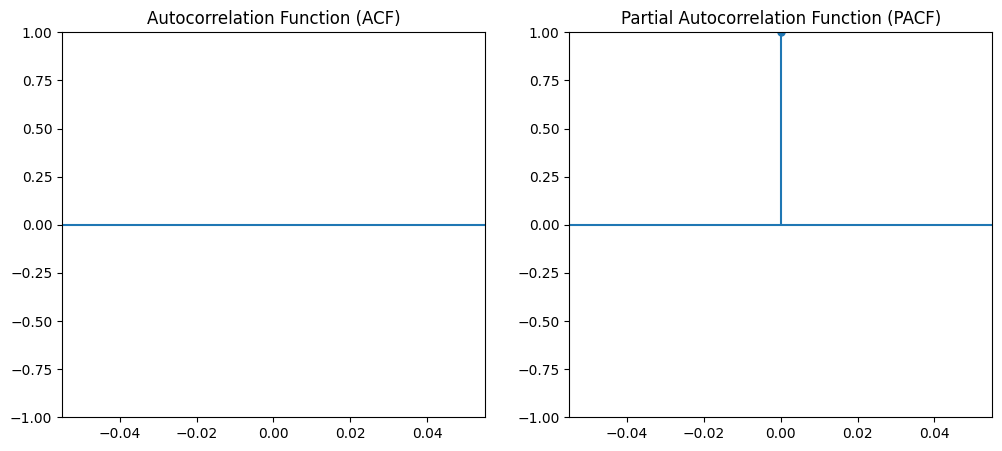

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

plot_acf(merge_df['coffee_diff'], lags=20, ax=ax[0])
ax[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(merge_df['coffee_diff'], lags=20, ax=ax[1])
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [307]:
model = ARIMA(merge_df['coffee_diff'], order=(1,1,1))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:            coffee_diff   No. Observations:                  419
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1589.908
Date:                Sun, 09 Mar 2025   AIC                           3185.815
Time:                        12:02:46   BIC                           3197.921
Sample:                             0   HQIC                          3190.601
                                - 419                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1940      0.027      7.286      0.000       0.142       0.246
ma.L1         -0.9998      0.396     -2.527      0.011      -1.775      -0.224
sigma2       114.0564     44.982      2.536      0.0